QUESTION#1 (b)

In [1]:
import numpy as np;
import pandas as pd;

In [2]:
data = pd.read_csv('regression_data.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
data.dtypes

Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
Square_meter            float64
dtype: object

In [6]:
#checking for null values
data.isnull().sum()

Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
Square_meter            0
dtype: int64

In [3]:
#converting squarefoot into square meter 
data['Square_meter']=data['Square_Footage']*0.0929030
data=data.drop("Square_Footage",axis=1)

In [4]:
data.head()

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Square_meter
0,2,1,1981,0.599637,0,5,2.623829e+05,126.348080
1,3,3,2016,4.753014,1,6,9.852609e+05,396.881616
2,1,2,2016,3.634823,0,9,7.779774e+05,333.707576
3,1,2,1977,2.730667,1,8,2.296989e+05,89.744298
4,2,1,1993,4.699073,0,8,1.041741e+06,457.640178


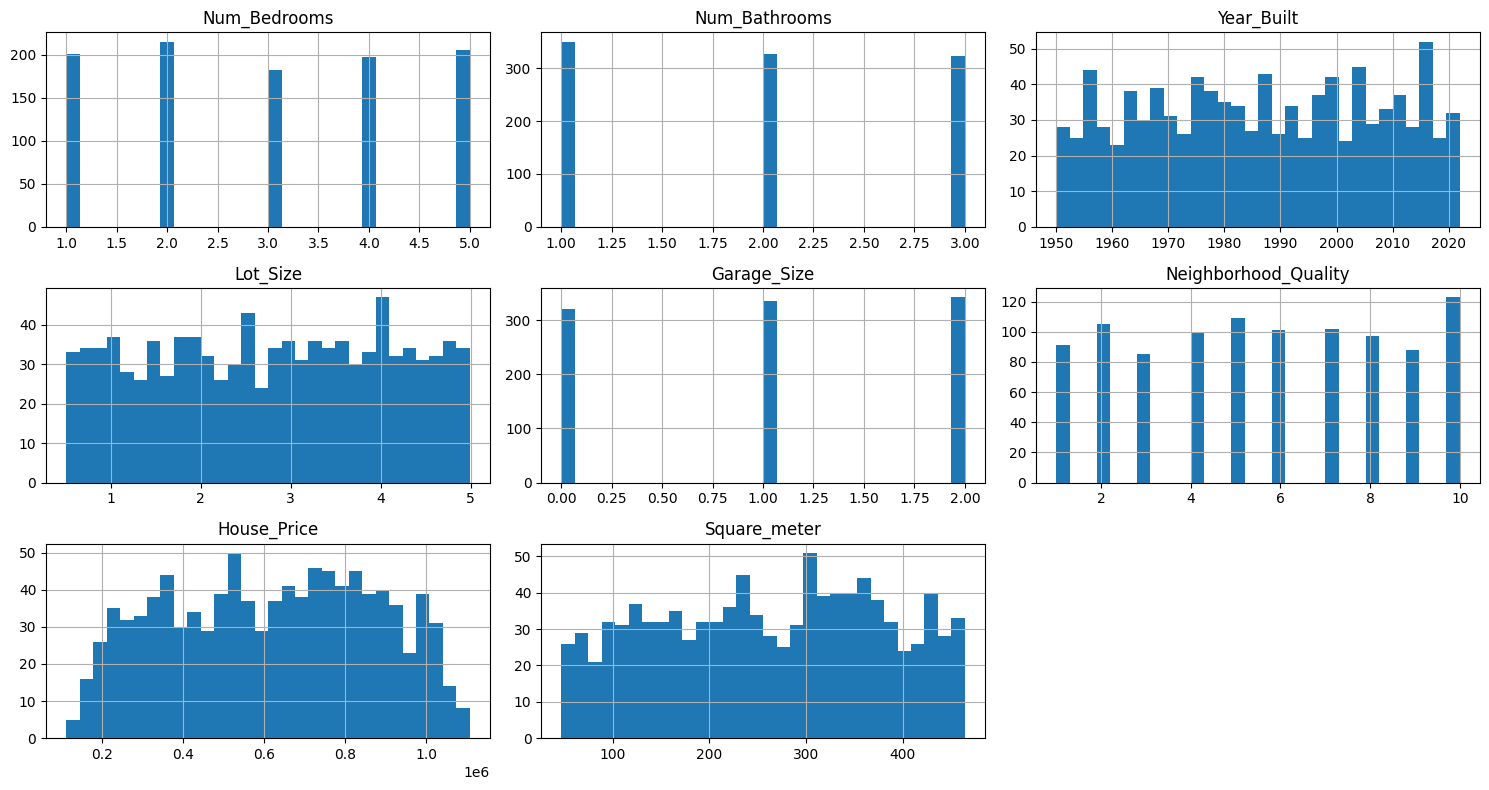

In [7]:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 8), bins=30) #makes histogram for numeric data
plt.tight_layout()
plt.show()

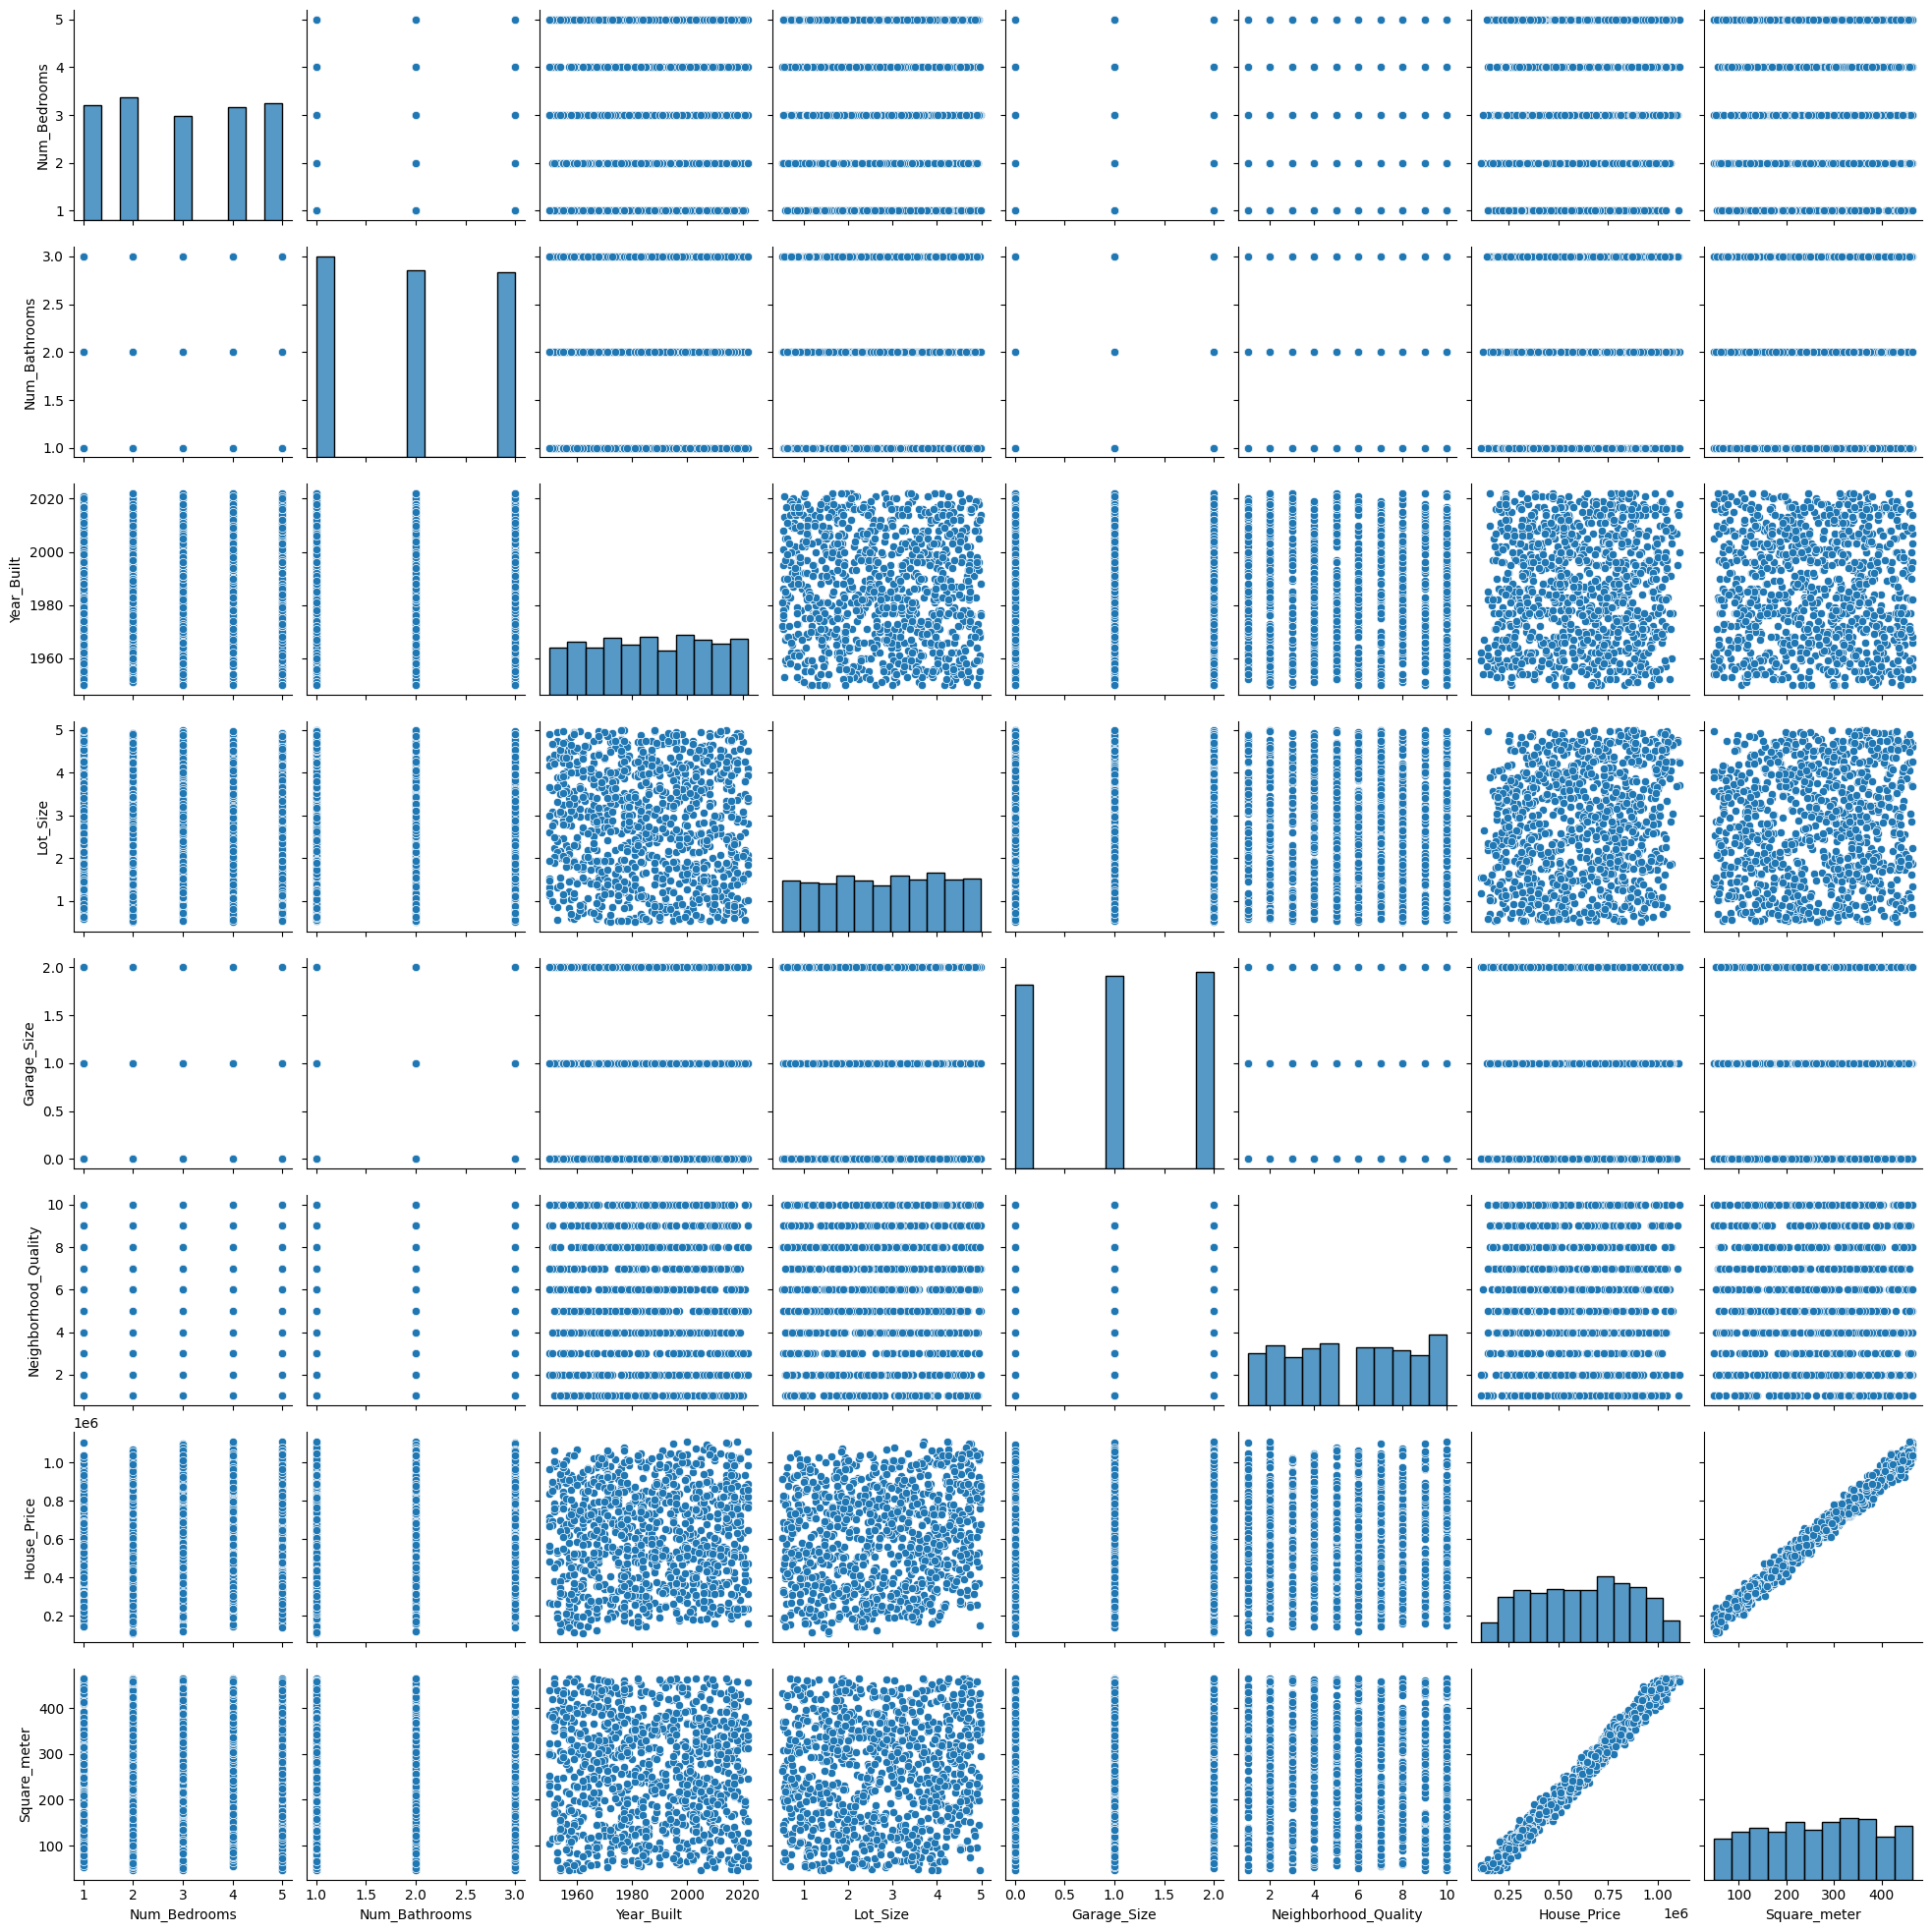

In [8]:
import seaborn as sns
sns.pairplot(data) #Seaborn library to create a pair plot
plt.show()
#distribution,correlation and patterns

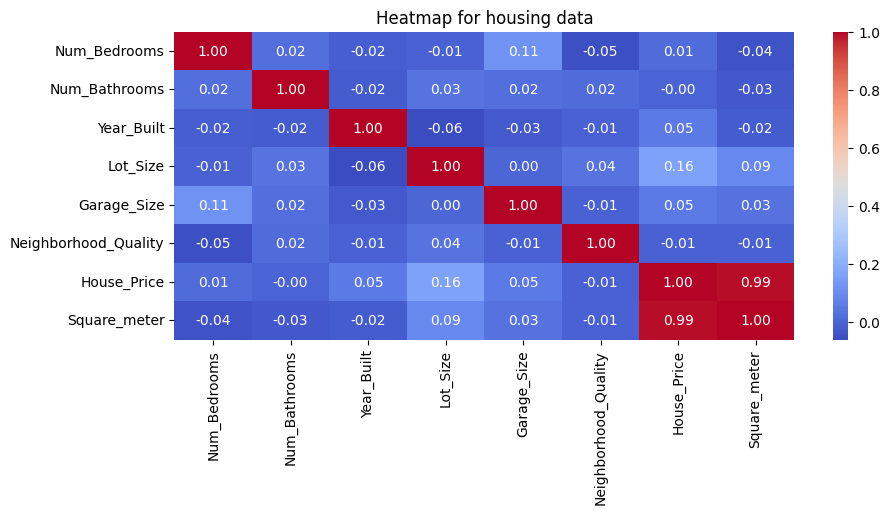

In [11]:
plt.figure(figsize=(10, 4))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap for housing data')
plt.show()

In [12]:
y = data['House_Price'] #dependent variable
x = data.drop("House_Price", axis=1) #independent variables

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=66, train_size=0.7)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9983192523671496

In [20]:
predictions = model.predict(x_test)
print(predictions)

[ 744846.94522289  122431.29678789  668516.1097625   415893.93317415
  884837.39753535  349518.3007671   480448.19599883  774535.71348613
  466564.54686703  436113.2967945   591302.0444889   878897.27057514
  630347.67349905  882232.82574744  248925.209217    753236.19076522
  509555.58962437  215342.87705827  584944.41981439  978823.18417523
  528026.60692426  644930.79522737  519528.16206422  907219.42196232
  531536.80276732  601103.90156316  697278.69803127  904785.21931216
  463149.15156662  934530.27906496  326598.89918418  189430.79426389
 1041065.4322276   814116.15016558  173976.61485377  159219.01917236
  312232.84513126  723874.30702315  434899.59657994  962975.93654117
 1055254.80464504  929179.43577529 1006036.12772317  544695.21343592
  988335.75011572 1011577.8969546   850913.36636702  929646.91428254
  687982.29920721  539449.70979381  870505.05617365 1035064.37939294
  761225.8204661   950772.21511601  893201.47052758  993762.37196277
  613425.25904889 1009574.45613713

In [23]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

            Actual      Predicted
188  752101.902421  744846.945223
951  120795.552367  122431.296788
650  665369.958932  668516.109762
823  418003.157259  415893.933174
118  886568.313228  884837.397535
..             ...            ...
512  557218.645639  553971.430607
139  893926.629472  896092.910675
313  935626.952928  935830.808888
31   883819.091122  880158.848707
376  294548.402560  290358.928689

[300 rows x 2 columns]
